In [5]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [34]:
df = pd.read_csv("../data/adult.csv")
df = df.replace("?", np.nan)
df = df.dropna()
conditions = [
    (df["salary K$"] <= 50),
    (df['salary K$'] > 50)
]

values = ['<=50k', '>50k']
df['salary'] = np.select(conditions, values)
print(df)

       Unnamed: 0  age         workclass   education      marital-status  \
0               0   39         State-gov   Bachelors       Never-married   
1               1   50  Self-emp-not-inc   Bachelors  Married-civ-spouse   
2               2   38           Private     HS-grad            Divorced   
3               3   53           Private        11th  Married-civ-spouse   
4               4   28           Private   Bachelors  Married-civ-spouse   
...           ...  ...               ...         ...                 ...   
32556       32556   27           Private  Assoc-acdm  Married-civ-spouse   
32557       32557   40           Private     HS-grad  Married-civ-spouse   
32558       32558   58           Private     HS-grad             Widowed   
32559       32559   22           Private     HS-grad       Never-married   
32560       32560   52      Self-emp-inc     HS-grad  Married-civ-spouse   

              occupation   relationship   race     sex  hours-per-week  \
0           A

# Task 1
Print the count of men and women in the dataset.

In [13]:
print(df["sex"].value_counts())

sex
Male      20380
Female     9782
Name: count, dtype: int64


# Task 2
Find the average age of men in dataset

In [106]:
print(df[df["sex"] == "Male"]["age"].mean())

39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [107]:
print(len(df[df["native-country"] == "Poland"])/len(df) * 100)

0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [35]:
mean_for_seniors = df[df["salary"] == "<=50k"]["age"].mean()
std_dev_for_seniors = df[df["salary"] == "<=50k"]["age"].std()
print(mean_for_seniors, std_dev_for_seniors)

36.60806038668668 13.464631257161633


In [36]:
mean_for_others = df[df["salary"] == ">50k"]["age"].mean()
std_dev_for_others = df[df["salary"] == ">50k"]["age"].std()
print(mean_for_others, std_dev_for_others)

43.95911028236548 10.269632835673852


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [108]:
higher_ed = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
big_without_hi_ed = df[~df["education"].isin(higher_ed)]
big_without_hi_ed = big_without_hi_ed[big_without_hi_ed["salary"] == ">50k"]
print(len(big_without_hi_ed))

3178


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [55]:
df.groupby(["age", "education"]).describe()

Unnamed: 0                                                \
                      count          mean           std     min       25%   
age education                                                               
17  10th              106.0  17480.990566   8637.003666   609.0  11099.25   
    11th              154.0  16706.259740   9615.122123   209.0   8638.00   
    12th               32.0  16342.718750   9087.301307   676.0   9914.25   
    5th-6th             1.0    335.000000           NaN   335.0    335.00   
    7th-8th             3.0  18738.333333   9463.059988  9971.0  13722.50   
...                     ...           ...           ...     ...       ...   
90  Bachelors           7.0  12237.285714   7118.816562  1935.0   7602.50   
    HS-grad            11.0  17518.363636  11082.227540   222.0  11028.50   
    Masters             4.0  12554.500000   8306.948477  5370.0   5397.00   
    Prof-school         1.0   8806.000000           NaN  8806.0   8806.00   
    Some-college        5.0   7944.000000   7027.123700  2303.0   2891.00   

                                             hours-per-week             ...  \
                      50%       75%      max          count       mean  ...   
age education                                                           ...   
17  10th          18608.0  24613.25  32447.0          106.0  19.896226  ...   
    11th          16841.5  25127.50  32282.0          154.0  19.448052  ...   
    12th          16479.5  24077.50  31864.0           32.0  18.500000  ...   
    5th-6th         335.0    335.00    335.0            1.0  48.000000  ...   
    7th-8th       17474.0  23122.00  28770.0            3.0  31.000000  ...   
...                   ...       ...      ...            ...        ...  ...   
90  Bachelors     11996.0  17152.50  22220.0            7.0  36.428571  ...   
    HS-grad       18725.0  26253.00  32277.0           11.0  40.000000  ...   
    Masters       12119.0  19276.50  20610.0            4.0  47.500000  ...   
    Prof-school    8806.0   8806.00   8806.0            1.0  72.000000  ...   
    Some-college   5104.0  10210.00  19212.0            5.0  37.400000  ...   

                             salary K$                                         \
                   75%   max     count        mean         std    min     25%   
age education                                                                   
17  10th          25.0  40.0     106.0   31.349057    9.442601   15.0   24.00   
    11th          21.5  45.0     154.0   32.655844    9.578967   15.0   25.00   
    12th          20.0  40.0      32.0   32.500000    9.425429   17.0   25.00   
    5th-6th       48.0  48.0       1.0   47.000000         NaN   47.0   47.00   
    7th-8th       42.5  45.0       3.0   35.000000   14.798649   18.0   30.00   
...                ...   ...       ...         ...         ...    ...     ...   
90  Bachelors     47.5  55.0       7.0  107.714286  132.360259   20.0   25.00   
    HS-grad       40.0  99.0      11.0   40.545455   31.094577   17.0   23.00   
    Masters       52.5  60.0       4.0  201.250000  131.154807   44.0  121.25   
    Prof-school   72.0  72.0       1.0  141.000000         NaN  141.0  141.00   
    Some-college  40.0  40.0       5.0   24.400000    9.889388   17.0   17.00   

                                        
                    50%     75%    max  
age education                           
17  10th           31.0   38.75   49.0  
    11th           31.0   40.00   49.0  
    12th           31.5   41.00   49.0  
    5th-6th        47.0   47.00   47.0  
    7th-8th        42.0   43.50   45.0  
...                 ...     ...    ...  
90  Bachelors      40.0  168.00  308.0  
    HS-grad        37.0   42.00  129.0  
    Masters       213.0  293.00  335.0  
    Prof-school   141.0  141.00  141.0  
    Some-college   22.0   25.00   41.0  

[930 rows x 24 columns]

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [75]:
married_m = df[(df["sex"] == "Male") & df["marital-status"].str.startswith("Married")]
free_men = df[(df["sex"] == "Male") & ~df.index.isin(married_m.index)]
print(married_m["salary K$"].mean() > free_men["salary K$"].mean())


True


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [77]:
max_hours = df["hours-per-week"].max()
print(len(df[df["hours-per-week"] == max_hours ]))

78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

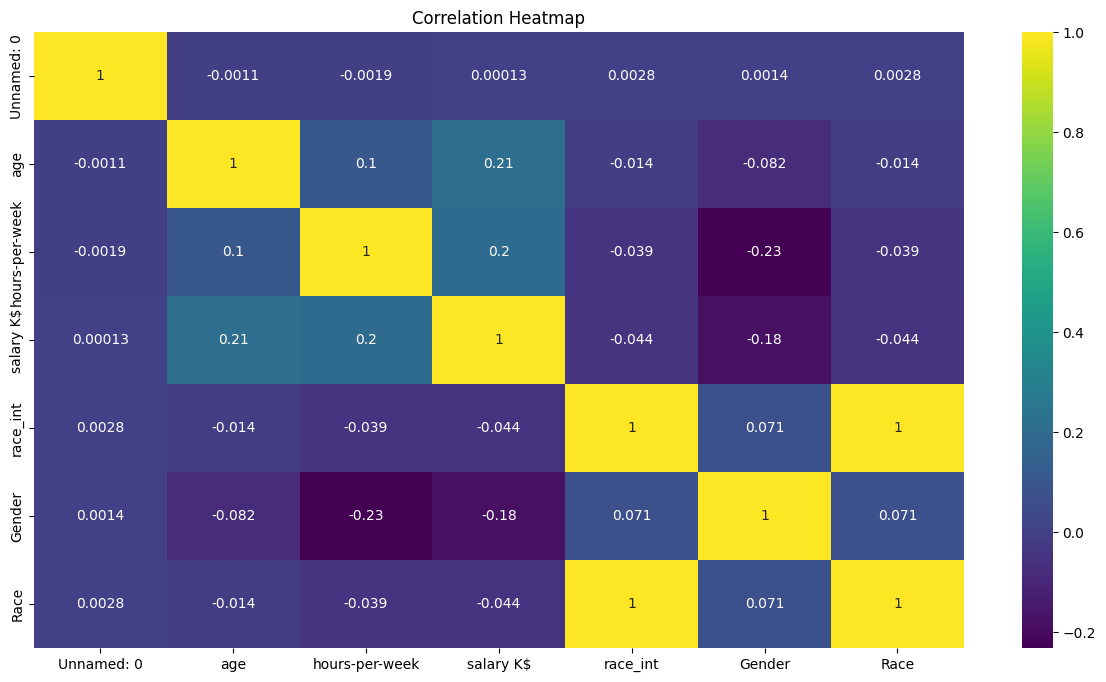

In [105]:
from matplotlib import pyplot as plt
import seaborn as sns
gender = {"Male": 1, 'Female': 2}
df["Gender"] = df["sex"].map(gender)
df['Race'] = df['race'].replace({'White': 1, 'Black': 2, 'Asian-Pac-Islander': 3, 'Amer-Indian-Eskimo': 4, 'Other': 0})
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation Heatmap")

plt.show()